In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv(r'C:\Users\adina\Downloads\Wine_clust.csv', encoding='unicode_escape')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Clustering using kmeans

In [4]:
#Select the relevant features for clustering
from sklearn.cluster import KMeans
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
            'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity',
            'Hue', 'OD280', 'Proline']
X = data[features]

In [5]:
#Find the optimum number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\adina\Desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adina\Desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adina\Desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adina\Desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

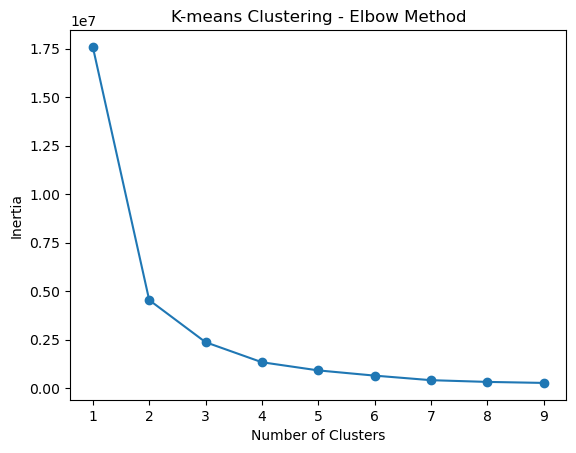

In [6]:
# Plot the inertia values
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-means Clustering - Elbow Method')
plt.show()

### Hierarchical clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg_labels = agg_clustering.fit_predict(X)

In [8]:
# Computing the linkage matrix
linkage_matrix = linkage(X, method='ward')

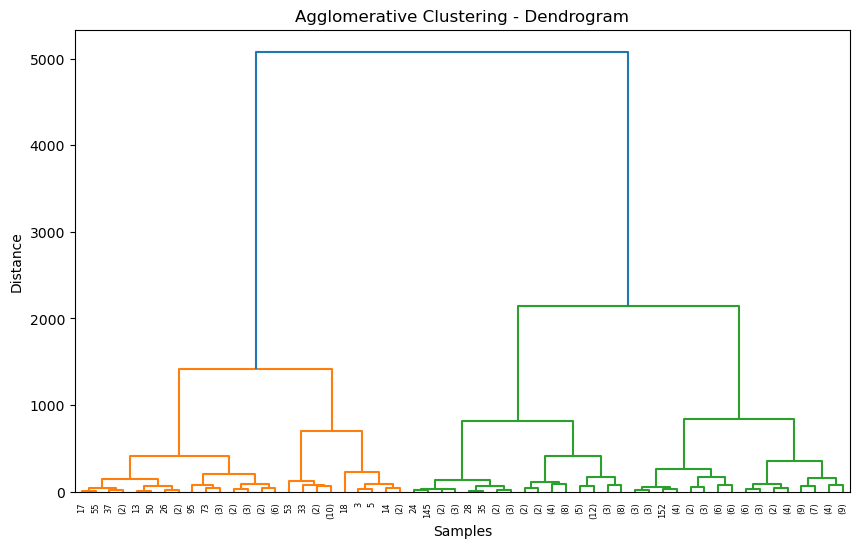

In [9]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Agglomerative Clustering - Dendrogram')
plt.show()

### dB scan clustering

In [22]:
# Remove any leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

In [24]:
# Clean the data by converting non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

In [25]:
# Drop rows with missing values (NaN)
data_cleaned = data.dropna()

In [29]:
# Select the relevant features for clustering
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
            'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity',
            'Hue', 'OD280', 'Proline']

In [30]:
X1 = data_cleaned[features]

In [31]:
from sklearn.cluster import DBSCAN

# Perform dBSCAN clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

In [36]:
# Get the number of clusters (excluding noise points)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters:", n_clusters_)

SyntaxError: invalid non-printable character U+00A0 (4098386538.py, line 3)